# Utilizzare realmente modelli di apprendimento automatico

## Li useremo

1. Prima nei modelli di 'classificazione' con la previsione di malattie cardiache
2. Sia nei modelli di regressione, con l'acquisto di case

### Ci sono due modi per fare predizioni

1. predict()
2. predict_proba()

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

heart_desease  = pd.read_csv("heart-disease.csv")

np.random.seed(42)

X=heart_desease.drop("target",axis=1)
y=heart_desease["target"]

# Split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.predict(X_test)
np.array(y_test)
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)
clf.score(X_test,y_test)

0.8524590163934426

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [6]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

## Acquisto di case (Modello di Regressione)

In [7]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df["target"] = housing["target"]

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)



In [9]:
heart_desease = pd.read_csv("heart-disease.csv")
heart_desease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluete_preds(y_true,y_preds):
    """

    """
    accurancy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accurancy": round(accurancy,2),
                  "precision": round(accurancy,2), 
                  "recall": round(recall,2),
                  "f1": round(f1,2),}
    print(f"Acc:{accurancy*100:2f}%")
    print(f"precision:{precision*100:2f}%")
    print(f"recall:{recall*100:2f}%")
    print(f"f1:{f1*100:2f}%")
    return metric_dict

In [11]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_desease_shuffled = heart_desease.sample(frac=1)

#SPlit in X e Y
X = heart_desease_shuffled.drop("target",axis=1)
y = heart_desease_shuffled["target"]

train_split = round(0.7 * len(heart_desease_shuffled)) #ovvero il 70% dei dati
valid_split = round(train_split + 0.15 * len(heart_desease_shuffled)) # ovvero il 15%
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)
baseline_metrics = evaluete_preds(y_valid,y_preds)
baseline_metrics

Acc:82.222222%
precision:81.481481%
recall:88.000000%
f1:84.615385%


{'accurancy': 0.82, 'precision': 0.82, 'recall': 0.88, 'f1': 0.85}

In [12]:
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train,y_train)

#Make prediction
y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluete_preds(y_valid,y_preds_2)
clf_2_metrics

Acc:82.222222%
precision:81.481481%
recall:88.000000%
f1:84.615385%


{'accurancy': 0.82, 'precision': 0.82, 'recall': 0.88, 'f1': 0.85}

## Adesso si provano gli Hyperparametri Randomizzati con RandomizedSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10,100,200,500,1000,2000],
    "max_depth": [None, 5,10,20,30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1,2,4]
}

np.random.seed(42)

X = heart_desease_shuffled.drop("target", axis=1)
y = heart_desease_shuffled["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)

# Configuro RandomizedSearchCV
# mettendo 10 iterazioni, lui prenderà 10 parametri diversi da grid
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10, #numero di modelli
                            cv=5,
                            verbose=2)
rs_clf.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

In [14]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [16]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluete_preds(y_test, rs_y_preds)

Acc:83.606557%
precision:78.125000%
recall:89.285714%
f1:83.333333%


In [18]:
grid_2 = {
    "n_estimators": [100,200,500],
    "max_depth": [None],
    "max_features": ["auto","sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1,2]
}

from sklearn.model_selection import GridSearchCV

# Configuro GridSearchCV
# mettendo 10 iterazioni, lui prenderà 10 parametri diversi da grid
gs_clf = GridSearchCV(estimator=clf, 
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\danie\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

In [19]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [20]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluete_preds(y_test,gs_y_preds)

Acc:81.967213%
precision:77.419355%
recall:85.714286%
f1:81.355932%


<Axes: >

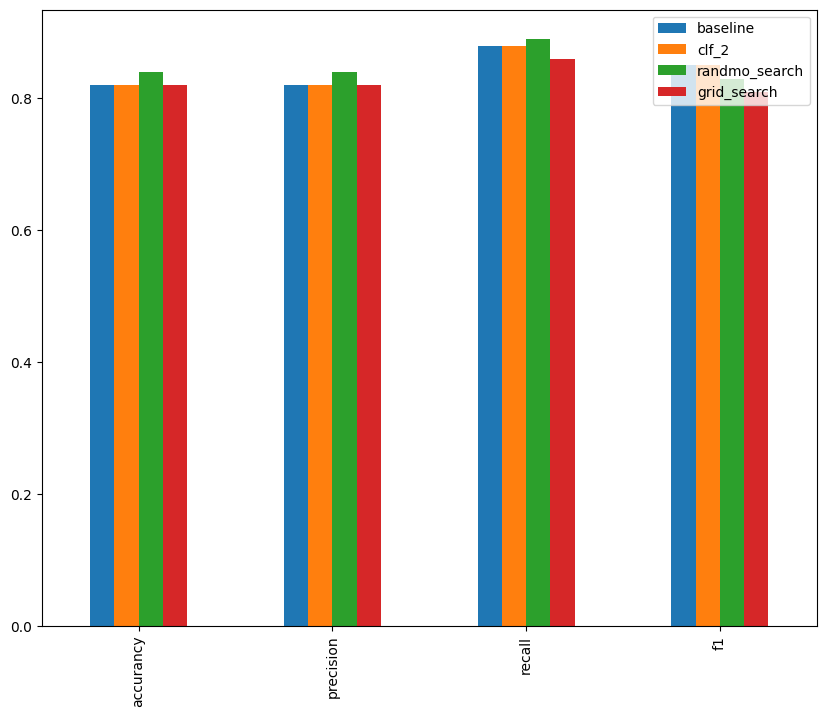

In [22]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf_2": clf_2_metrics, "randmo_search": rs_metrics,"grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))